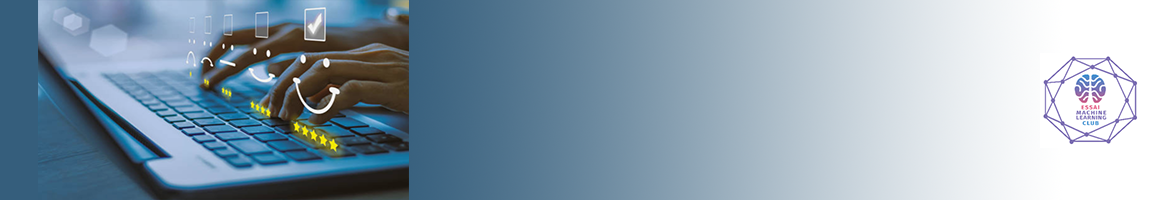

# **Human emotion detection** by using CNN



Build a classifier that detects human emotion from an image

## Project description


Computer vision is now one of the most important applications of machine learning because it enables computers to interpret and understand the visual world in a way that is similar to how humans do. It has many practical applications, as it allows computers to perform tasks that require a high-level understanding of visual data. It involves the development of algorithms and systems that can analyze, interpret, and understand visual data in order to perform tasks such as object recognition, image classification, and scene understanding.
Computer vision problems are often treated using CNNs, which are a type of deep learning algorithm that are often used for computer vision tasks. CNNs are particularly well suited for image classification and object recognition tasks, as they are able to automatically learn and extract features from images.
CNNs have achieved state-of-the-art results on many computer vision benchmark, which is why it is important as a machine-learning beginner to be acquainted with them.
Figuring out what emotion humans are feeling is a crucial step to create intelligent robots. Ones that can react based meaningfully to what a human is feeling.
In this project, we will be building a classifier that classifies images of various emotions into their respective emotion.

## Tools


Tools to use in this project:
- CNNs
- Data augmentation
- Classification evaluation metrics

## Data

**Dataset description**
The data we are going to use is five folders containing images of expressions of emotion:
- **‘anger’**: A folder containing images of angry expressions
- **‘contempt’**: A folder containing images of expressions conveying contempt
- **‘disgust’**: A folder containing images of expressions conveying disgust
- **‘fear’**: A folder containing images of fearful expressions
- **‘happy’** : A folder containing images of happy expressions
- **‘sadness’**: A folder containing images of sad expressions
- **‘surprise’**: A folder containing images of expression conveying surprise

## Visualize the images


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import cv2
import os

## Load & label theData


In [ ]:
DataDirc = "/content/drive/MyDrive/Human emotion detection/CK+48"
Emotions = ["anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"]

for emotion in Emotions:
  path = os.path.join(DataDirc, emotion)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array, cmap="gray")
    plt.axis('off')
    plt.show()
    break
  break

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(DataDirc)

In [ ]:
data

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
# Images represented as numpy arrays
batch[0].shape

In [ ]:
os.listdir(DataDirc)

In [ ]:
# Images represented as label
# class 0 = anger
# class 1 = contempt
# class 2 = disgust
# class 3 = fear
# class 4 = happy
# class 5 = sadness
# class 6 = surprise

batch[1]

In [ ]:
fig,ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(Emotions[batch[1][idx]])



## Scale data

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch =scaled_iterator.next()

In [ ]:
batch[0].max()

## Split Data

In [ ]:
len(data)

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
test_size+val_size+train_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Creating the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
])

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

## Train

In [ ]:
logdir = '/content/drive/MyDrive/Human emotion detection resources/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
his = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

## Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(his.history['loss'], color='teal', label='loss')
plt.plot(his.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(his.history['accuracy'], color='teal', label='accuracy')
plt.plot(his.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Test

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Human emotion detection resources/ibrahim.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.axis('off')
plt.show()

In [ ]:
resize.shape

In [ ]:
np.expand_dims(resize, 0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
print(f'Predicted class is '+Emotions[np.argmax(yhat)])

## Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join("/content/drive/MyDrive/Human emotion detection resources/Model", "EmotionsDetection.h5"))

In [ ]:
new_model = load_model(os.path.join("/content/drive/MyDrive/Human emotion detection resources/Model", "EmotionsDetection.h5"))

In [ ]:
new_model